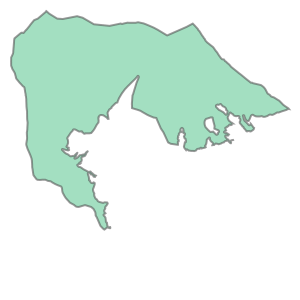

QUEMA_TORNAVACAS_1 union all select geom from QUEMA_TORNAVACAS_2_Camino union all select geom from QUEMA_TORNAVACAS_3_faja_Camino_LA_CAMPANA union all select geom from QUEMA_TORNAVACAS_4 union all select geom from QUEMA_TORNAVACAS_5_Entre_rios union all select geom from QUEMA_TORNAVACAS_6_Pared_EL_Cardal_La_Campana union all select geom from quema_tornavacas_perimetro_ccaa1 union all select geom from quema_tornavacas_perimetro_ccaa2


/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fd89c9f3ad0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fd89e76a1d0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fd89c9f3830> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fd89c136e30> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/nano/minic

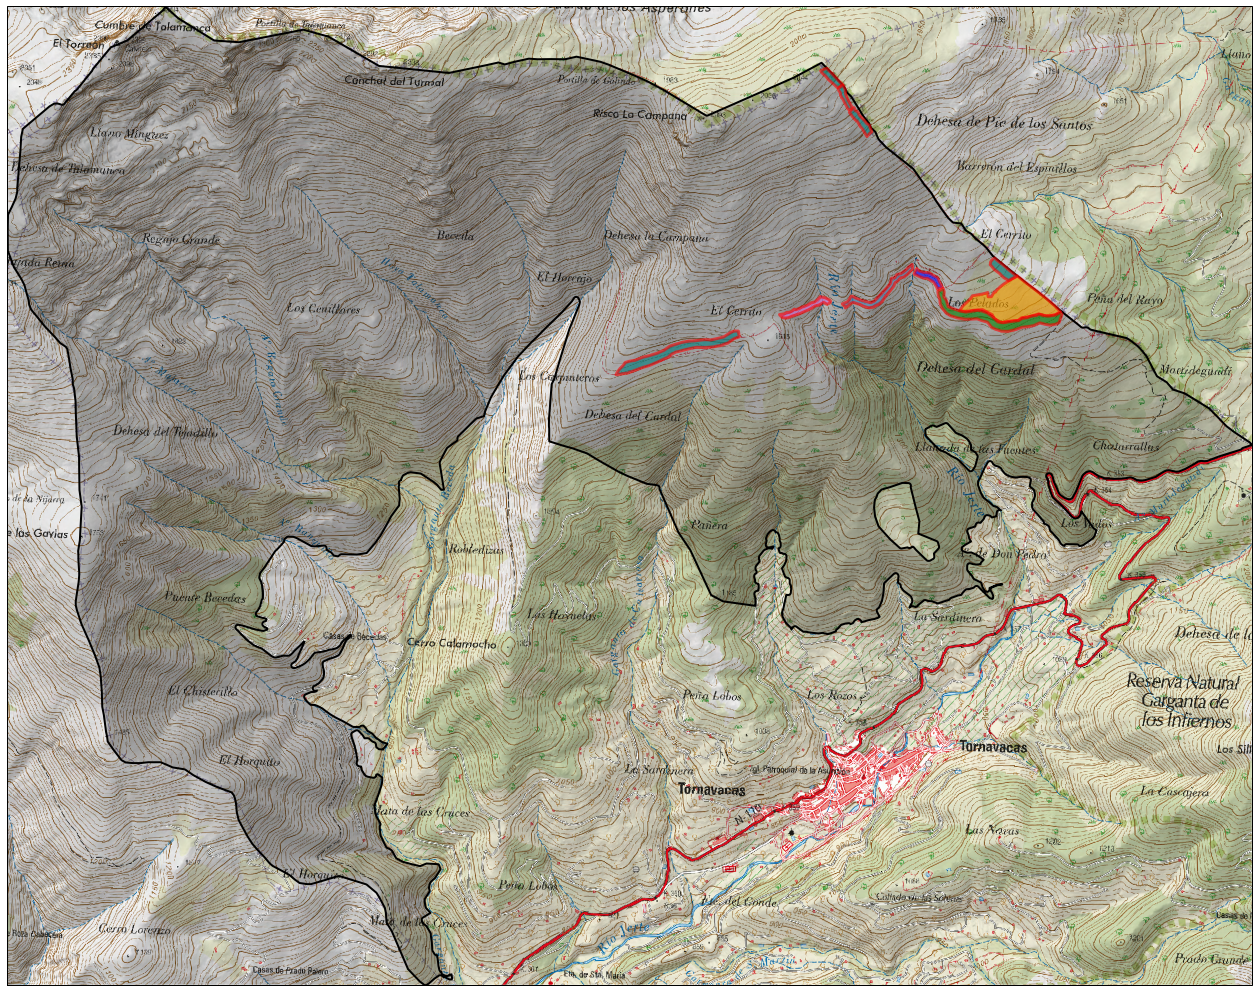

In [10]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from config import config

params = config()
conn = psycopg2.connect(**params)

ze = gpd.read_postgis('select * from zona_estudio_tornavacas', conn)

proj = ccrs.epsg('25830')

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)
lim = ze.bounds
ax.set_extent([lim['minx'],lim['maxx'], lim['miny'], lim['maxy']], crs=proj)
ax.add_geometries(ze.loc[[0], 'geom'], facecolor='#00000030', linewidth=2, edgecolor='black', crs=proj)
display(ze.loc[0]['geom'])
ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])

colors = ['orange', 'green', 'blue', 'steelblue', 'orchid', 'teal', 'teal', 'teal']

a = !ls ../FINALES/PARCELAS/TORNAVACAS/*shp
b = list(map(lambda x: x.split('/')[-1].split('.')[0], a))
print(' union all select geom from '.join(b))
for index, parcela in enumerate(a):
    nombre = parcela.split('/')[-1].split('.')[0]
    p = gpd.read_postgis('select * from {}'.format(nombre), conn)
    ax.add_geometries(p['geom'], facecolor=colors[index], alpha=0.6, edgecolor='red', linewidth=3, crs=ccrs.Geodetic())
# fig.savefig('static/images_quemas/parcelas_tornavacas', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close(fig)

conn.close()